In [1]:
from __future__ import print_function

%matplotlib inline
%precision 16

import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 1:  Review

## Question 1

**(a)** [5] Consider the polynomial
$$\begin{aligned}
    p(x) &= (x - 2)^9 \\
         &= x^9 - 18 x^8 + 144 x^7 - 672 x^6 + 2016 x^5 - 4032 x^4 + 5376 x^3- 4608 x^2+ 2304 x- 512.
\end{aligned}$$
Plot the two different representations of the same polynomial above using the points $x = 1.920, 1.921, 1.922, \ldots, 2.080$.

<function matplotlib.pyplot.show(close=None, block=None)>

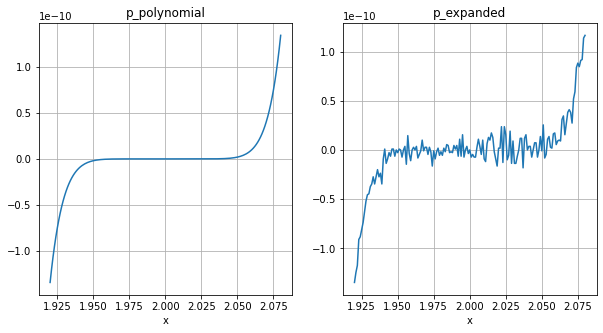

In [2]:
x = numpy.linspace(1.920,2.080,161)



p1 = ( x - 2 )**9

p2 = x**9 - 18 * x**8 + 144 * x**7 - 672 * x**6 + 2016 * x**5 - 4032 * x**4 + 5376 * x**3 - 4608 * x**2 + 2304 * x - 512

fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(1,2,1)
axes.set_title("p_polynomial")
axes.set_xlabel("x")
plt.plot(x,p1)
axes.grid()

axes = fig.add_subplot(1,2,2)
axes.set_title("p_expanded")
axes.set_xlabel("x")
plt.plot(x,p2)
axes.grid()
plt.show




# # YOUR CODE HERE
# raise NotImplementedError()

**(b)** [5] Compute each of the terms in the polynomial above separately (i.e. compute `x**9` by itself, `-18.0 * x**8`, etc.) for the value at $x = 2$ and some other $x$ values very close to $2$.

<function matplotlib.pyplot.show(close=None, block=None)>

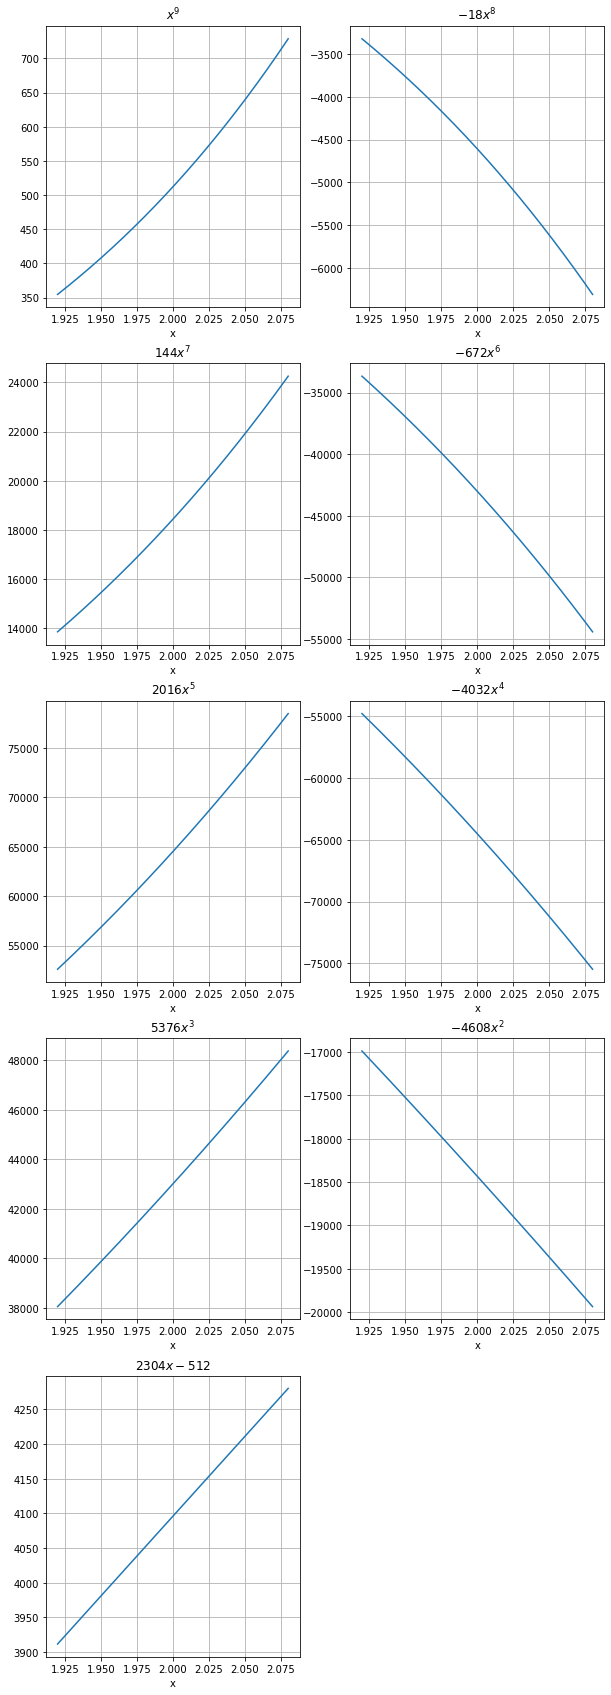

In [3]:
x = numpy.linspace(1.920,2.080,801)

p1 = x**9 
p2 = - 18 * x**8 
p3 = 144 * x**7 
p4 = - 672 * x**6 
p5 = 2016 * x**5 
p6 = - 4032 * x**4 
p7 = 5376 * x**3 
p8 = - 4608 * x**2 
p9 = 2304 * x - 512

fig = plt.figure(figsize=(10,30))
axes = fig.add_subplot(5,2,1)
axes.set_title("$x^9$")
axes.set_xlabel("x")
plt.plot(x,p1)
axes.grid()

axes = fig.add_subplot(5,2,2)
axes.set_title("$- 18x^8$")
axes.set_xlabel("x")
plt.plot(x,p2)
axes.grid()


axes = fig.add_subplot(5,2,3)
axes.set_title("$144x^7 $")
axes.set_xlabel("x")
plt.plot(x,p3)
axes.grid()

axes = fig.add_subplot(5,2,4)
axes.set_title("$- 672x^6$")
axes.set_xlabel("x")
plt.plot(x,p4)
axes.grid()

axes = fig.add_subplot(5,2,5)
axes.set_title("$2016x^5 $")
axes.set_xlabel("x")
plt.plot(x,p5)
axes.grid()

axes = fig.add_subplot(5,2,6)
axes.set_title("$- 4032x^4$")
axes.set_xlabel("x")
plt.plot(x,p6)
axes.grid()

axes = fig.add_subplot(5,2,7)
axes.set_title("$5376x^3 $")
axes.set_xlabel("x")
plt.plot(x,p7)
axes.grid()

axes = fig.add_subplot(5,2,8)
axes.set_title("$- 4608x^2$")
axes.set_xlabel("x")
plt.plot(x,p8)
axes.grid()

axes = fig.add_subplot(5,2,9)
axes.set_title("$2304x - 512$")
axes.set_xlabel("x")
plt.plot(x,p9)
axes.grid()

plt.show







# # YOUR CODE HERE
# raise NotImplementedError()

**(c)** [10] Describe the behavior you see in part (a) using what you saw in part (b).  If these are analytically equivalent what is the source of the differences?  Be as specific as you can be.

In part a, we can easily see that the answer of p_expanded has many jumps, and this function experiences a overall growth with a platform at around $x=2$. We can tell from part (b) that there are 9 different terms of x and each of them has a unique tendency, but overall the growing up tendency overweights the growing down tendency and since it is (x-2) to the power of 9, it is a monotonically growing function

And because of machine epsilon, the expansion is so much different from $(x-2)^9$. computer cannot represent the exact values since each term has its own calculation error and just like the butterfly effect, the final "curve" of expansion has the same tendency overall but lost many details and has many unexpected jumps because of the repeated subtraction

## Question 2

**(a)** [15] Show how to derive analytically the backward finite difference approximation to the 1st derivative that is 2nd order accurate assuming a stencil that has equal width between the stencil points.  You can use the numerical method introduced in the lecture notes to check your work but you must show how to derive the coefficients analytically as well (you can use the procedure the function is based on).  Also make sure to explicitly find the leading order form of the truncation error $\tau$.

**Answer to Question 2:**

For backward, we can have:
$$\begin{aligned}
    u{x_{i-1}} &= u{x_i} - \Delta x u'{x_i} + \Delta x^2 \frac{1}{2} u''{x_i} - \Delta x^3 \frac{1}{6} u'''{x_i} + \mathcal{0}{\Delta x^4} \\
    u{x_{i-2}} &= u{x_i} - 2 \Delta x u'{x_i} + \Delta x^2 \frac{4}{2} u''{x_i} - \Delta x^3 \frac{8}{6} u'''{x_i} + \mathcal{0}{\Delta x^4}
    \end{aligned}
$$

$$ f'(x) \approx P'_2(x) = [y_1,y_0] + ((x - x_1)+(x-x_2))[y_2,y_1,y_0] \\ = \frac{y_0-y_1}{x_0-x_1} + ((x-x_2)+(x-x_1))(\frac{y_0 - y_1}{(x_0 - x_1)(x_0 - x_2)} - \frac{y_1 - y_2}{(x_1 - x_2)(x_0 - x_2)}) \\ = \frac{f(x_0)-f(x_1)}{x_0-x_1} + (2x-x_1-x_2) \left (\frac{f(x_0)-f(x_1)}{(x_0-x_1)2\Delta x} - \frac{f(x_1)-f(x_2)}{(x_1-x_2)2\Delta x} \right ) \\ f'(x_2) = \frac{f(x_0)-4f(x_1)+3f(x_2)}{2\Delta x} $$

To find truncation error, we can expand it by applying **Taylor Series**:
$$\begin{aligned}
    \tau &= -\frac{2}{\Delta x} \left( -\Delta x^3 \frac{1}{6} u'''{x_i} + \mathcal{0}(\Delta x^4) \right ) + \frac{1}{2 \Delta x} \left ( -\Delta x^3 \frac{8}{6} u'''(x_i) + \mathcal{0}(\Delta x^4) \right)\\
         &= u'''(x_i) \Delta x^2 \left(\frac{2}{6} - \frac{4}{6} - \frac{4}{6}\right) + \mathcal{0}(\Delta x^3)\\
         &= - \Delta x^2 \frac{1}{3} u'''(x_i) + \mathcal{0}(\Delta x^3)
        \end{aligned}$$
$$f'(x_2) + R(x) = f'(x_2) - \Delta x^2 \frac{2}{6} u'''(x_i) + \mathcal{O}(\Delta x^3)$$

Then: $R(x)= - \Delta x^2 \frac{2}{6} u'''(x_i) + \mathcal{O}(\Delta x^3)$

**(b)** [10] Write a function that computes this 1st derivative of an arbitrary function $f(x)$ using the backward difference approximation you used above.  The function should accept a set of points `x` to evaluate the 1st derivative at and the function `f`.  For the first points in `x` use the forward difference approximation that mirrors the one you just found (see the lecture notes).

In [4]:
def compute_prime(x, f):
    """Compute the first derivative"""
    # YOUR CODE HERE
    
    N = numpy.size(x)
    dx = x[1] - x[0]
    
    f_prime = numpy.empty(x.shape)
    
    for i in range(2,N):
        f_prime[i] = (f(x[i - 2]) - 4 * f(x[i - 1]) + 3 * f(x[i])) / (2 * dx)
    
    f_prime[0] =  (-3.0 * f(x[0])  +  4.0 * f(x[1])  - f(x[2]))  / (2.0 * dx)
    f_prime[1] =  (-3.0 * f(x[1])  +  4.0 * f(x[2])  - f(x[3]))  / (2.0 * dx)
    f_prime[-1] = ( 3.0 * f(x[-1]) + -4.0 * f(x[-2]) +   f(x[-3])) / (2.0 * dx)
    
#    raise NotImplementedError()
    return f_prime

In [5]:
x = numpy.linspace(0.25, 0.5 * numpy.pi, 150)
f = lambda x: x**3 / numpy.sin(x)
a = compute_prime(x, f)

In [6]:
f = lambda x: x**3 / numpy.sin(x)
f_prime = lambda x: -x**3 * numpy.cos(x) / numpy.sin(x)**2 + 3.0 * x**2 / numpy.sin(x)
x = numpy.linspace(0.25, 0.5 * numpy.pi, 150)
numpy.testing.assert_allclose(compute_prime(x, f), f_prime(x), atol=1e-3)
print("Success!")

Success!


**(c)** [15] Using your function above plot the derivative of the function and error convergence behavior for the functions.  
$$
    f(x) = \frac{x^3}{\sin x}, \quad \quad g(x) = |x - 3/2|, \quad \text{and} \quad h(x) = \left \{ \begin{aligned} 0 & & x < 3/2 \\ 1 & & x \ge 3/2 \end{aligned} \right .
$$
on the interval $x \in [1, 2]$.  Explain the behavior you see.

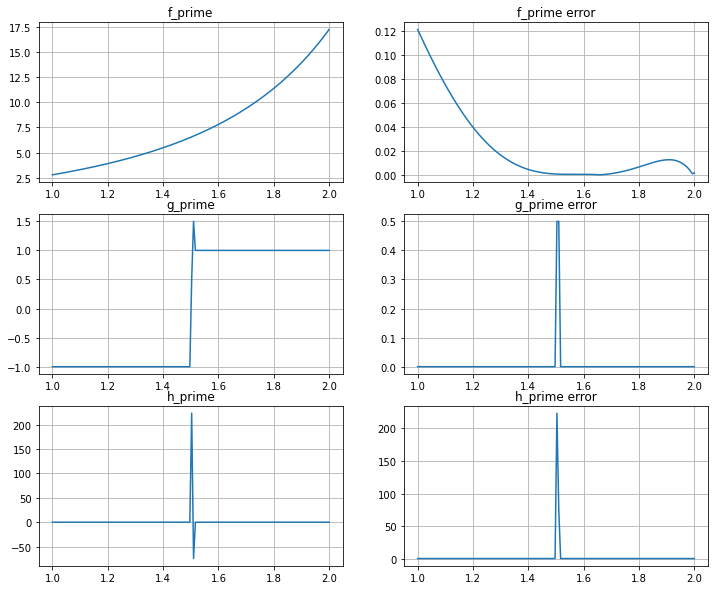

In [7]:
# f(x)
f = lambda x: x**3 / numpy.sin(x)

# g(x)
g = lambda x: numpy.abs(x - 3 / 2)

# h(x)
def h(x):
    hx = numpy.empty(x.shape)
    hx[x < 3/2] = 0
    hx[x >= 3/2] = 1
    return hx

x = numpy.linspace(1,2,150)

f_prime = lambda x: -x**3 * numpy.cos(x) / numpy.sin(x)**x + 3.0 * x**2 / numpy.sin(x)
g_prime = lambda x: (x - 3/2) / numpy.abs(x - 3/2)

plt.figure(figsize = (12,10))
plt.subplot(3,2,1)
plt.title("f_prime")
plt.plot(x,compute_prime(x,f))
plt.grid()

plt.subplot(3, 2, 2)
plt.title("f_prime error")
plt.plot(x, numpy.abs((compute_prime(x, f) - f_prime(x))))
plt.grid()
    
plt.subplot(3, 2, 3)
plt.title("g_prime")
plt.plot(x, compute_prime(x, g))
plt.grid()
    
plt.subplot(3, 2, 4)
plt.title("g_prime error")
plt.plot(x, numpy.abs((compute_prime(x, g) - g_prime(x))))
plt.grid()
    
plt.subplot(3, 2, 5)
plt.title("h_prime")
plt.plot(x, compute_prime(x, h))
plt.grid()
    
plt.subplot(3, 2, 6)
plt.title("h_prime error")
plt.plot(x, numpy.abs(compute_prime(x, h)))
plt.grid() 
    

# # YOUR CODE HERE
# raise NotImplementedError()

The jumps in g_prime, h_prime and the related divergence graphs are formed by the points that can not be differentiated

# Question 3
Solving the following PDEs showing the relevant steps and plot a few time snapshots of the solution.

**(a)** [15] $u_t = \kappa u_{xx}$ with $x \in \Omega = (0, L)$, the boundary conditions $u(0, t)_x = 0$ and $u_x(L, t) = 0$, and the initial condition $u(x, 0) = 2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)$.  When plotting the solution pick a value for $L$ and play with values of $\kappa$.  Make sure your solution makes sense as $t \rightarrow \infty$.

**Answer to Question 3(a)**

By applying **Separation of Variables**, we can then convert $u(x,t)$ to something like a combination of two functions, such as $\phi(x)G(t)$, and got something below:
$$
\phi(x)G_t = \phi_{xx}G(t)
$$

Introducing the separation constant $K$, we will get:

$$\frac{1}{kG}G_t = \frac{\partial^2 \phi}{\partial x^2} = -K$$
$$\phi_{xx}=-K\phi, G_t = -K kG$$

The general solution to $G_t = -K kG$ is $G(t) = ce^{-K kt}$

For $\phi_{xx}=-K\phi$, the auxiliary polynomial is $r^2 + K = 0; r=\pm \sqrt{K}$ so the solution should be: <br>

$$\phi(x) = c_1 \cos(\sqrt{K}x) + c_2 \sin(\sqrt{K}x)$$
$$\phi'(x)=\sqrt{K}(-c_1 \sin(\sqrt{K}x) + c_2 \cos(\sqrt{K}x))$$

Since $u(0,t)_x=0$, then I got $c_2=0$\
Since from the original assumption, $K > 0$. So, for $u_x(L,t)=0$, got:

$$0 = -c_1 \sqrt{K}\sin(\sqrt{K}L)$$ in order not to bring up trivial solution, assume $c_1 \neq 0$ then got: <br>

$$\sin(\sqrt{K}L)=0 \implies \sqrt{K}L=n\pi \implies K = (\frac{n\pi}{L})^2,n=1,2,3,4,\cdots$$

Then the solution is:
$$\phi(x) = c_1 \cos\left(\frac{n\pi x}{L} \right)$$

Combining yields:
$$u(x,t) = A_0 + \sum_{n=1}^{\infty} A_n \cos\left(\frac{n\pi x}{L} \right) e^{-\left(\frac{n\pi}{L}\right)^2kt}$$

$A_0$ and $A_n$ are below:
$$A_0 = \frac{1}{L}\int_{0}^{L}f(x)dx$$
$$A_n = \frac{2}{L}\int_{0}^{L}f(x)\cos(\frac{n\pi x}{L})dx$$

Then the given initial condition is satisfied when:
$$2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)=\sum_{n=0}^{\infty}A_n \cos(\frac{n\pi x}{L})$$

where:
$$A_0 = \frac{1}{L}\int_{0}^{L} 2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)dx=2$$
$$A_n = \frac{2}{L}\int_{0}^{L} \left(2 - \cos\left(\frac{\pi x}{L} \right) + 3 \cos\left(\frac{3 \pi x}{L} \right)\right)
\cos \left(\frac{n\pi x}{L}\right) dx$$

For $A_n$, we have that $A_n=-1$ when $n=1$ and $A_n=3$ when $n=3$ and it is $0$ for all other values of $n$, so:

$$
u(x,t)=2 - \cos(\frac{\pi x}{L})e^{-(\pi/L)^2 kt} + 3\cos(\frac{3\pi x}{L})e^{-(3\pi/L)^2 kt}
$$

so we can see clearly when $t\rightarrow \infty$, $u(x,t)\rightarrow 2$

Text(0.5, 0.92, 'kappa=1500')

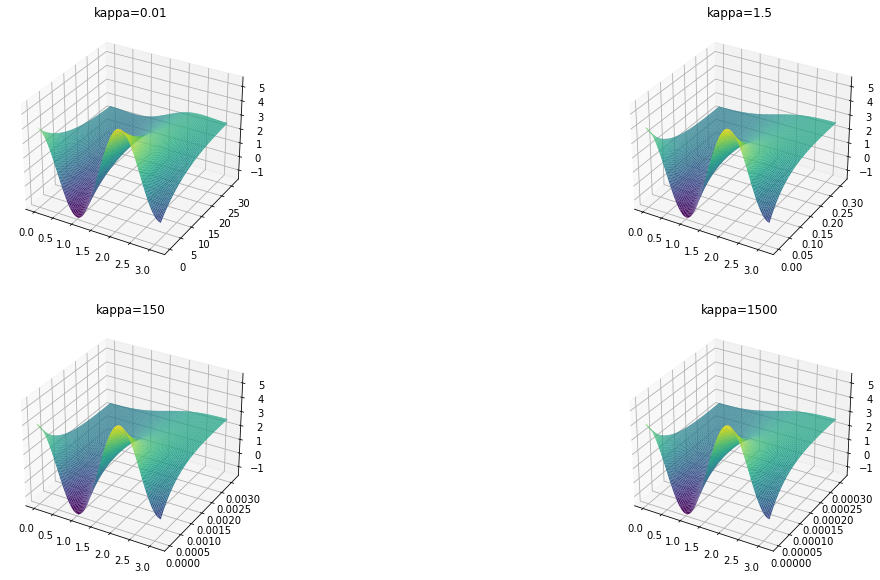

In [8]:
def u(x, t, L=numpy.pi):
    u = 2 - numpy.cos(numpy.pi * x / L) * numpy.exp( -(numpy.pi / L)**2 * (k * t)) + 3 * numpy.cos(3 * numpy.pi * x / L) * numpy.exp( -(3 * numpy.pi / L)**2 * (k * t))
    return u

fig = plt.figure(figsize=(20,10))


k = 0.01
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 10 * numpy.pi, 100)
X, T = numpy.meshgrid(x, t)
Z = u(X, T)
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('kappa={}'.format(k))


k=1.5
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 0.1 * numpy.pi, 100)
X, T = numpy.meshgrid(x, t)
Z = u(X, T) 
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('kappa={}'.format(k))


k=150
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 0.001 * numpy.pi, 100)
X, T = numpy.meshgrid(x, t)
Z = u(X, T) 
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('kappa={}'.format(k))


k=1500
x = numpy.linspace(0, numpy.pi, 100)
t = numpy.linspace(0, 0.0001 * numpy.pi, 100)
X, T = numpy.meshgrid(x, t)
Z = u(X, T) 
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_surface(X, T, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('kappa={}'.format(k))


# # YOUR CODE HERE
# raise NotImplementedError()

**(b)** [15] Solve the PDE $u_t + \left(\frac{1}{2}u^2\right)_x = 0$ where $x \in \Omega = \mathbb R$ and the initial conditions
$$ 
    u(x,0) = \left \{ \begin{aligned}
        1 & & x \leq 0 \\
        2 & & x > 0
    \end{aligned} \right .
$$
In addition to plotting the solution also mark the edges of interesting regions such as the rarefaction fan or the shock.

The pde: $u_t + (\frac{1}{2}u^2)_x = 0$ can be converted to $u_t + uu_x = 0$ by considering Burger's equation

Also, by transforming PDE into ODE, the chain rule gives something below:
$$
\frac{du}{dt} = \frac{\partial u}{\partial t} + \frac{dx}{dt}\frac{\partial u}{\partial x}
$$

We can also know: $$\frac{du}{dt}=0$$ and $$\frac{dx}{dt}=u$$.

Substituting the initial conditions:
$$ 
    u(x,0) = \left \{ \begin{aligned}
        1 & & x \leq 0 \\
        2 & & x > 0
    \end{aligned} \right .
$$

Suppose x is a funtion of t: $x(t)$\
Solving yields:

$$
u(x,t) = u(x(t),0)
$$

And:

$$
x(t) = ut + x_0
$$

which is $t+x_0$ for $x\leq 0$ and $2t+x_0$ for $x>0$:
$$ 
    x(t) = \left \{ \begin{aligned}
        t+x_0 & & x \leq 0 \\
        2t+x_0 & & x > 0
    \end{aligned} \right .
$$

after substitution, we can easily get something below:
$$ 
    u(x,t) = \left \{ \begin{aligned}
        1 & & x < t \\
        x/t & & t < x \leq 2t \\
        2 & & x > 2t
    \end{aligned} \right .
$$

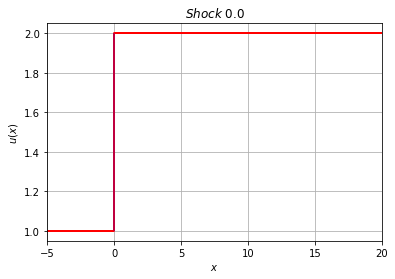

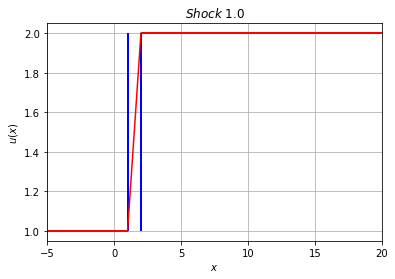

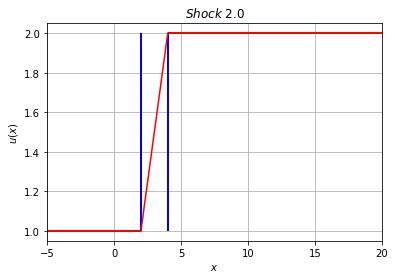

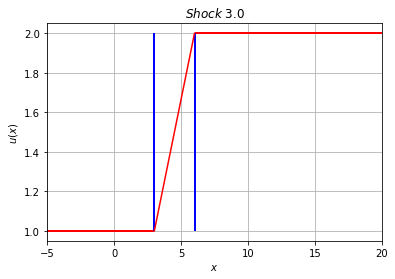

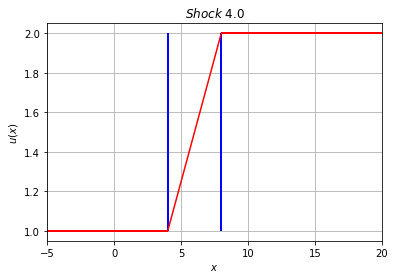

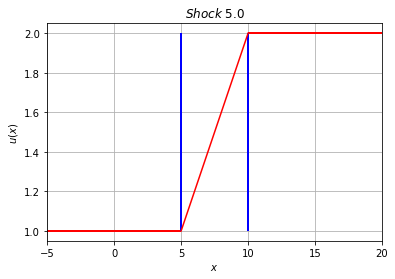

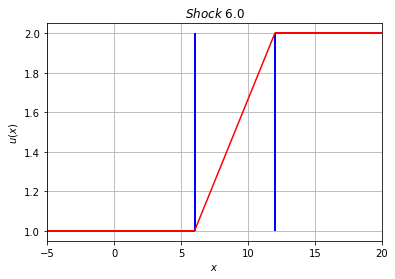

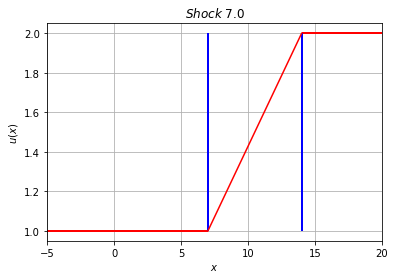

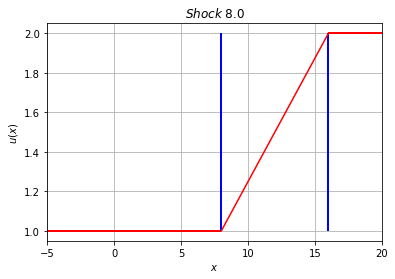

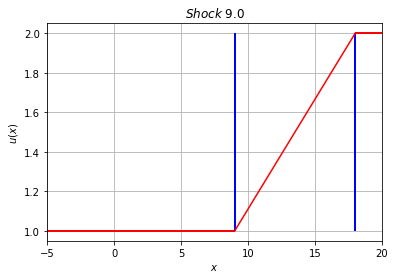

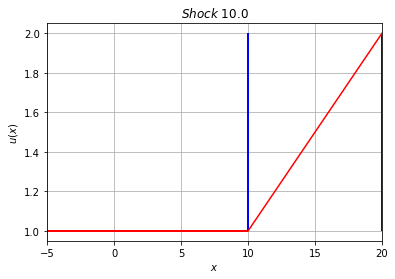

In [9]:
t = numpy.linspace(0,10,11)  #limit the domain of t but actually t can be anything
x_0 = numpy.linspace(-5,5,11)


# def x(t,x_0):
#     xt = numpy.empty(t.shape)
#     xt[x <= 0] = t + x_0
#     xt[x > 0 ] = 2 * t + x_0 
#     return xt

fig = plt.figure()

for i in range(len(t)):
    plt.hlines(y=1, xmin=-5, xmax=int(t[i]), linewidth=2, color='r') #left horizontal line
    plt.hlines(y=2, xmin=2 * int(t[i]), xmax=20, linewidth=2, color='r') #riht horizontal line
    plt.vlines(x=t[i],ymin=1,ymax=2,linewidth=2, color='b')
    plt.vlines(x=2 * t[i],ymin=1,ymax=2,linewidth=2, color='b')
    plt.plot([t[i],2* int(t[i])],[1,2],'r') #shock
    plt.xlim(-5,20)
    plt.title("$Shock$ {}".format(t[i]))
    plt.xlabel("$x$")
    plt.ylabel("$u(x)$")
    plt.grid()
    plt.show()
    

# # YOUR CODE HERE
# raise NotImplementedError()